# Исследование объявлений о продаже квартир в Санкт-Петербурге

## Описание проекта

В моём распоряжении данные сервиса "Яндекс Недвижимость" — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

**Цель исследования** - научиться определять рыночную стоимость объектов недвижимости.
На основе статистики о платёжеспособности клиентов в процессе исследования необходимо проверить следующие гипотезы:

**Ход исследования** - данные из архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет будут получены из файла `Данные (проект 3).csv` или `real_estate_data.csv`. О качестве данных ничего неизвестно, поэтому перед тем, как приступить к основной части проекта, понадобится получить первые впечатления о данных, далее на этапе предобработки проверить данные на качество и наличие в них различных ошибок, пропусков и аномалий, если что-то подобное присутствует, необходимо будет исправить самые критичные ошибки и привести датафрейм к нормальному, рабочему состоянию. 
 
Таким образом, исследование пройдёт в четыре этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных 
 4. Итоговый вывод

## 1. Обзор данных
На данном этапе будет сформирована первая картина о данных сервиса Яндекс Недвижимости, с которыми предстоит работать дальше. 

In [1]:
# Подключение библиотек
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot') 

In [2]:
try:
    df = pd.read_csv('Данные (проект 3).csv', sep = '\t') # Чтение файла на локальном юпитере
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') # Чтение файла на юпитере тренажёра 
# df.to_csv('Данные (проект 3).csv', index=False)

In [3]:
# Первые 5 строк датафрейма выводим на экран
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
# Получаем общую информацию о данных, представленных в таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в таблице 22 столбца. Тип данных в столбцах — `object`,`float64`, `int64 ` и `bool`

Согласно документации к данным, столбцы имеют следующие значения:
* `total_images` — число фотографий квартиры в объявлении;
* `last_price` — цена на момент снятия с публикации; 
* `total_area` — площадь квартиры в квадратных метрах (м²);
* `first_day_exposition` — дата публикации;
* `rooms` — число комнат;
* `ceiling_height` — высота потолков (м);
* `floors_total` — всего этажей в доме;
* `living_area` - жилая площадь в квадратных метрах (м²);
* `floor` - этаж;
* `is_apartment` - апартаменты (булев тип);
* `studio` - квартира-студия (булев тип);
* `open_plan` - свободная планировка (булев тип);
* `kitchen_area` - площадь кухни в квадратных метрах (м²);
* `balcony` - число балконов;
* `locality_name` - название населённого пункта;
* `airports_nearest` - расстояние до ближайшего аэропорта в метрах (м);
* `cityCenters_nearest` - расстояние до центра города (м);
* `parks_around3000` - число парков в радиусе 3 км;
* `parks_nearest` - расстояние до ближайшего парка (м);
* `ponds_around3000` - число водоёмов в радиусе 3 км;
* `ponds_nearest` - расстояние до ближайшего водоёма (м);
* `days_exposition` - сколько дней было размещено объявление (от публикации до снятия);

Считаю, что названия некоторых колонок написаны с нарушением стиля. Также количество значений в столбцах различается, следовательно, в данных есть пропущенные значения. 

**Выводы**

Исходя из первого впечатления о данных, замечу, что некоторые столбцы подлежат изменению названия, обработке пропусков, а также изменению типа данных. 

## 2. Предобработка данных
На данном этапе будут устранены выявленные проблемы в данных

In [5]:
# Изменяем названия некоторых столбцов
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                        'parks_around3000': 'parks_around_3000', 
                        'ponds_around3000': 'ponds_around_3000'})

In [6]:
# Проверяем, как поменялись названия столбцов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
# Считаем пропущенные значения в таблице
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Вывод**

Мы видим, что пропусков достаточно много, поэтому следует их обработать. В столбце `balcony` можно предположить логичную замену: если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. 

Если для других данных нет подходящего значения на замену, то в этом случае правильно оставить эти значения пустыми.

В столбце `floors_total` пропуски можно либо удалить, либо заменить значением `floor`.

Что касается столбцов `living_area`, `kitchen_area`, то пропуски в жилой площади можно найти из среднего соотношения жилой площади к общей по всему датафрейму. Пропуски в площади кухни лучше оставить как есть.

Данные в столбце `days_exposition` исследуем относительно дня публикации `first_day_exposition` и мы видим, что чем дата позднее, тем пропусков больше. Скорее всего эти объявления еще не сняты с публикации. Пропуски следует оставить.

В столбцах `airports_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000`, `ponds_nearest` значения заполняются автоматически и пропуски значат, что скорее всего рядом нет этих объектов. Что касается  `parks_around_3000`, `ponds_around_3000`, то мы можем предположить, что если значение не заполнено, то парков и прудов поблизости нет и заменить на 0.

В столбце `city_centers_nearest` данные отсутствуют в основном в тех локациях, для которых центр не был вычислен, например в деревнях и селах. Пропуски стоит оставить.

Пропуски в столбце `locality_name` мы вычислить не можем, поэтому лучше будет их удалить.  

Возможные причины пропусков:
1. Сбои при выгрузке датафрейма из базы данных 
2. Ошибки при вводе данных 
3. Пропуск пользователем некоторых полей для заполнения информацией    

In [8]:
# Пропуски в столбце про число балконов заменяем на ноль
df['balcony'] = df['balcony'].fillna('0')

In [9]:
# Исправление пропусков в столбце floors_total на соответствующее значение из столбца floor
df['floors_total'] = df['floors_total'].fillna(df['floor'])

In [10]:
# Заполнение пропусков в living_area: пропуски в жилой площади можно найти из среднего соотношения жилой площади к общей по всему датафрейму
k_area = df[df['living_area'].isnull() == False]['total_area'].mean() / df[df['living_area'].isnull()== False]['living_area'].mean()
df['living_area'] = df['living_area'].fillna(df['total_area'] / k_area)

In [11]:
# Исправление пропусков в столбце про высоту потолков медианным значением
median_ceiling = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(median_ceiling)

In [12]:
# Меняем пропуски в столбцах с категориальными переменными
df['is_apartment'] = df['is_apartment'].fillna('False')

In [13]:
# Заполнение пропусков в столбцах parks_around_3000, ponds_around_3000
df['parks_around_3000'] = df['parks_around_3000'].fillna(0) 
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(0)

In [14]:
# Удаляем пропуски в столбце locality_name
df_filtered = df.dropna(subset = ['locality_name'])

In [15]:
# Проверяем, как отработал код
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000           0
parks_nearest           15620
ponds_around_3000           0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [16]:
# Замена одного типа данных на другой и добавление столбца с днём недели, месяцем и годом публикации объявления
df['day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [17]:
# Проверяем как справился код с задачей
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  object        
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### Добавление вспомогательных столбцов в таблицу

In [18]:
# Нахождение цены за 1 кв. м. 
df['price_per_square_meter'] = df['last_price'] / df['total_area']
# Соотношение жилой и общей площади квартиры
df['ratio_residential_total_area'] = df['living_area'] / df['total_area']
# Соотношение площади кухни к общей площади квартиры
df['ratio_kitchen_total_area'] = df['kitchen_area'] / df['total_area']
# Добавляем столбец с этажом квартиры; варианты — первый, последний, другой
def apartment_floor (data):
    if data['floor'] == 1:
        return 'Первый'
    if data['floor'] == data['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
df['category_floor'] = df.apply(apartment_floor, axis=1)

In [19]:
# Проверяем как отработал написанный код выше
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,day_exposition,price_per_square_meter,ratio_residential_total_area,ratio_kitchen_total_area,category_floor
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,1.0,482.0,2.0,755.0,NaN,2019-03-07,120370.370370,0.472222,0.231481,Другой
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,...,0.0,NaN,0.0,NaN,81.0,2018-12-04,82920.792079,0.460396,0.272277,Первый
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,...,1.0,90.0,2.0,574.0,558.0,2015-08-20,92785.714286,0.612500,0.148214,Другой
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,91.177695,9,False,...,2.0,84.0,3.0,234.0,424.0,2015-07-24,408176.100629,0.573445,NaN,Другой
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,2.0,112.0,1.0,48.0,121.0,2018-06-19,100000.000000,0.320000,0.410000,Другой


## 3. Исследовательский анализ данных 

### 3.1. Изучение отдельных параметров датафрейма

In [20]:
parametrs = ['total_area', 'last_price', 'rooms', 'ceiling_height']
addit_parametrs = [
    ['Площадь, м²', 'Распределение площади', 0, 200],
    ['Цена, руб.', 'Распределение цены (на момент снятия с публикации)', 0, 30000000],
    ['Количество комнат', 'Распределение числа комнат', 0, 7],
    ['Высота потолков, м', 'Распределение высоты потолков', 2, 5]
                  ]
def hist_histogram(dataframe):
    dict_parametrs = dict(zip(parametrs, addit_parametrs))
    for f in parametrs:
        plt.figure(figsize=(12, 5))
        dataframe[f].plot(kind='hist', bins=100, 
                          range=(dict_parametrs[f][2], dict_parametrs[f][3]), 
                          title='Распределение {}'.format(f), grid=True)
        plt.title(dict_parametrs[f][1])
        plt.xlabel(dict_parametrs[f][0])
        plt.ylabel('Количество квартир, шт.')

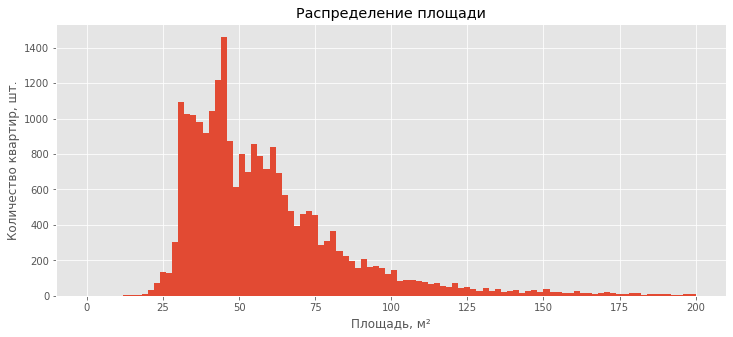

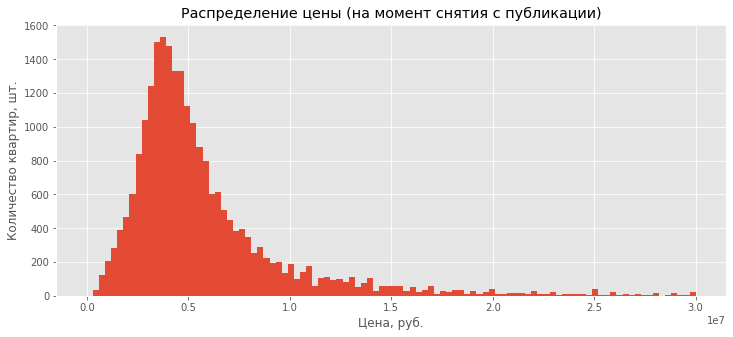

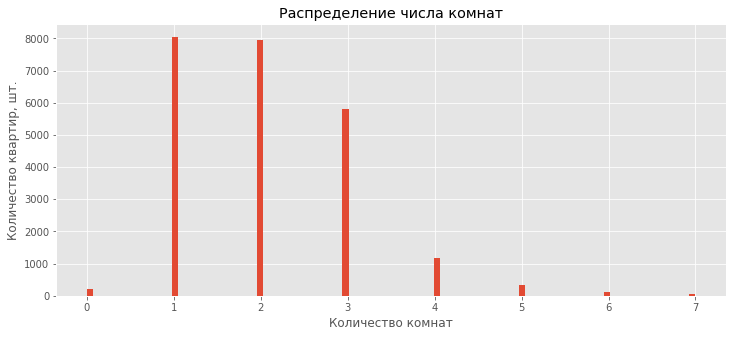

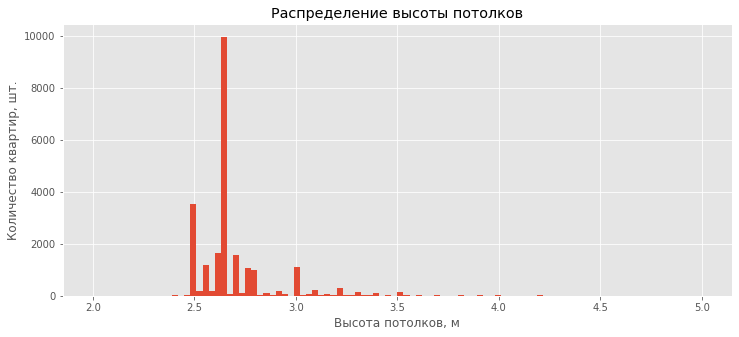

In [21]:
hist_histogram(df)

**Вывод**

На первом и втором графиках прослеживается нормальное распределение. Анализируя график с площадью, можно заметить, что наиболее частая площадь анализируемых квартир, которые есть в данной датафрейме - 30 - 60 кв. метров. 

Что касается цены, то наибольшее количество квартир находятся в ценовом диапазоне от 4 до 5 млн. рублей. Если говорить про количество комнат, то у подавляюющего большинства квартир их 1-2. Трёхкомнатые также можно встретить достаточно часто, но всё же реже, чем те, про которые сказал ранее. Ну и совсем редкие квартиры, у которых комнат от 4 и более. 

Также на графике видно, что есть и те, у которых число комнат равно нулю, я полагаю, что это студии - их также очень мало. 

Говоря про высоту потолков, замечу, что у большиснтва квартир они равны около 2.6 метров. 

In [22]:
# Создаём новую переменную, где будет лежать датафрейм без выбивающихся значений, и уже далее будем работать с ней
# Отфильтровываем выбивающиеся значения по высоте потолков
df_filtered = df.query('2 < ceiling_height < 4')
# Второй способ срезать данные
df_filtered = df_filtered[(df_filtered['ceiling_height'] > 2) & (df_filtered['ceiling_height'] < 4)]

In [23]:
# Отфильтровываем выбивающиеся значения по цене на момент снятия с публикации
df_filtered = df_filtered[df_filtered['last_price'] < 25000000]

In [24]:
# Отфильтровываем выбивающиеся значения по общей площади
df_filtered = df_filtered[df_filtered['total_area'] < 250]

In [25]:
# Подсчёт доли значений, которые были удалены
len(df_filtered) / len(df)

0.9741761255749187

**Вывод**

Было удалено 3% первоначальных данных, что является допустимым. 

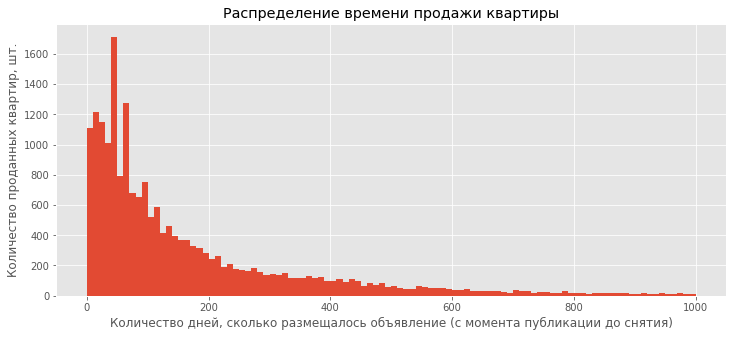

In [26]:
# Изучаем время продажи квартиры
plt.figure(figsize=(12, 5))
df_filtered['days_exposition'].plot(kind='hist', bins = 100, 
                                    range=(0,1000), grid=True)
plt.title('Распределение времени продажи квартиры')
plt.ylabel('Количество проданных квартир, шт.')
plt.xlabel('Количество дней, сколько размещалось объявление (с момента публикации до снятия)');

In [27]:
df_filtered['days_exposition'].value_counts()

45.0      877
60.0      536
7.0       232
30.0      204
90.0      185
         ... 
1484.0      1
793.0       1
773.0       1
1030.0      1
1174.0      1
Name: days_exposition, Length: 1128, dtype: int64

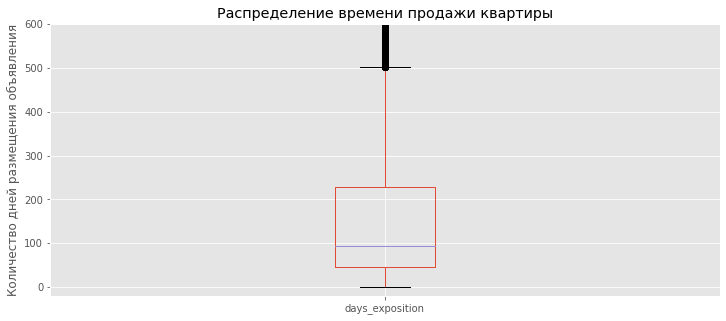

In [28]:
plt.figure(figsize=(12, 5))
df_filtered.boxplot('days_exposition')
plt.title('Распределение времени продажи квартиры')
plt.ylabel('Количество дней размещения объявления')
plt.ylim(-20, 600);

In [29]:
# Изучим числовые характеристики столбца
df_filtered['days_exposition'].describe() 

count    20064.000000
mean       178.397677
std        216.964168
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод**

Обычно продажа занимает около 100 дней (медианное значение по столбцу равно 95 дней). Исходя из числовой характеристики, гистограммы, а также диаграммы размаха, можно заметить, что продажи квартир, которые длились более 500 дней, явялются необычно долгими, так как начиная, приблизительно, с этого значения, заканчивается предел нормальных значений. Наибольшее скопление данных видно в диапазоне от 50 до 230. Но значимыми данными можно считать те, что не превышают 500 дней. Однако с целью анализа данных, я оставлю побольше значений в выборке, поэтому уберу значения, которые превышают 1000 дней. 

Также в данных есть минимальное значение: 1 день, это заставляет насторажиться, однако продажа квартиры за 1 день, в нашем случае, находится в пределах диапазона нормальных значений, да и в целом это вполне реально, следовательно, по нижней границе значения можно не трогать.

In [30]:
# Очищаем данные от необычно долгих продаж
df_filtered.query('days_exposition < 1000').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,day_exposition,price_per_square_meter,ratio_residential_total_area,ratio_kitchen_total_area,category_floor
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,2018-12-04,82920.792079,0.460396,0.272277,Первый
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,2015-08-20,92785.714286,0.612500,0.148214,Другой
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,2018-06-19,100000.000000,0.320000,0.410000,Другой
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,False,...,0.0,NaN,0.0,NaN,55.0,2018-09-10,95065.789474,0.473684,0.299342,Другой
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,2.65,26.0,10.6,6,False,...,0.0,NaN,0.0,NaN,155.0,2017-11-02,99195.710456,0.284182,0.386059,Другой


### 3.2. Изучение зависимости между данными

Факторы, которые необходимо проверить на взаимосвязь с ценой квартиры:
1. Площадь квартиры в квадратных метрах
2. Количество комнат в квартире
3. Отдалённость от центра

In [31]:
# Функция для изучения влияния отзывов пользователей и критиков на продажи для самых перспективных платформ
score = ['total_area', 'ceiling_height', 'rooms']
labels = [
    ['Площадь, м²'],
    ['Высота потолков, м'],
    ['Количество комнат']
         ]
def scatter_plot(df):
    labels_dict = dict(zip(score, labels))
    for i in score:
        df.plot(x=i, y='last_price', kind='scatter', figsize=(12, 5))
        plt.xlabel(labels_dict[i][0])
        plt.ylabel('Цена, руб')
        plt.title(f'Распределение {i}')

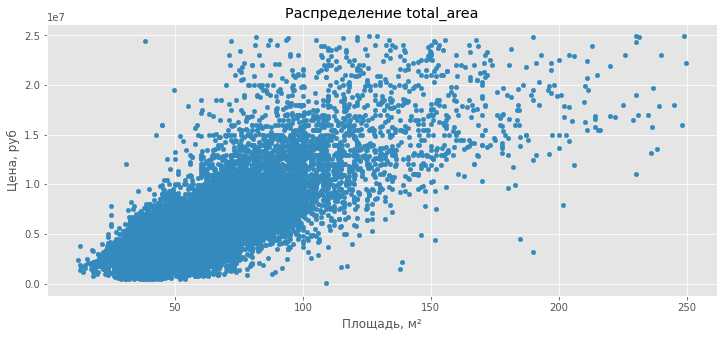

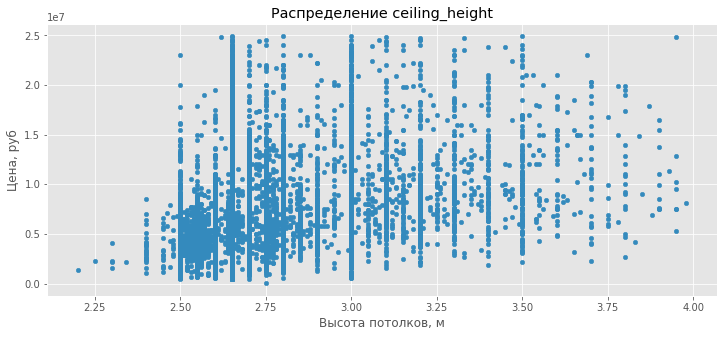

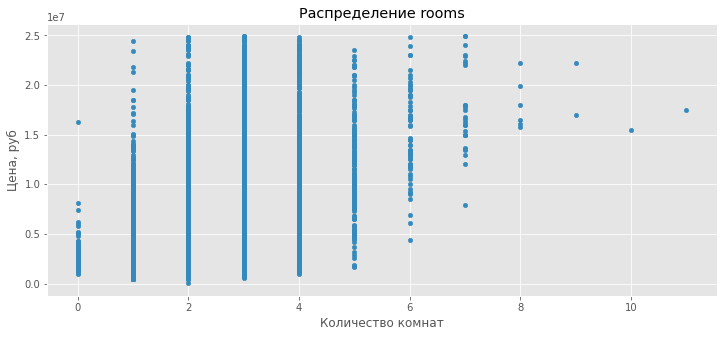

In [32]:
scatter_plot(df_filtered)

**Вывод**

Что касается зависимости цены от площади, то на графике прослеживается следующая тенденция: чем больше площадь квартиры, тем больше её стоимость. А также, с увеличением площади, уменьшается и количество таких больших квартир. 

Что касается количества комнат в квартире, то тенденция такая же: с увеличением количества комнат, увеличивается и итоговая стоимость квартиры. После пяти комнат, график идёт на снижение, вероятно, от того, что таких квартир, с числом комнат больше 5, встречается намного реже остальных. 

Если говорить про зависимость цены от удалённости от центра, то здесь зависимость та же: видим, что, чем дальше квартира находится от центра, тем её стоимость ниже. А также с увеличением расстояния до центра, количество таких квартир уменьшается. 

In [33]:
# Считаем коэффициент корреляции Пирсона
df_filtered[['last_price', 'total_area', 'rooms', 'city_centers_nearest', 'ceiling_height']].corr()

,last_price,total_area,rooms,city_centers_nearest,ceiling_height
last_price,1.000000,0.784989,0.513566,-0.351153,0.429193
total_area,0.784989,1.000000,0.799535,-0.211000,0.374684
rooms,0.513566,0.799535,1.000000,-0.152867,0.203459
city_centers_nearest,-0.351153,-0.211000,-0.152867,1.000000,-0.286111
ceiling_height,0.429193,0.374684,0.203459,-0.286111,1.000000


**Вывод**

Если говорить про площадь, то здесь прямая зависимость. Показатель также находится на достаточно высоком уровне. Это говорит о том, что при увеличении числа комнат, стоимость квартиры будет увеличиваться. 

Что касается количества комнат, то здесь также прямая зависимость, но не такая большая, как с площадью. 

Анализируя зависимость цены от отдалённости от центра, то здесь прослеживается обратная зависимость, так как коэффициент отрицательный. Это говорит о том, что при увеличении показателя удалённости от центра, стоимость на квартиру будет снижаться. 

In [34]:
# Изучаем зависимость цены от этажа
def bar_floor(dataframe):
    (dataframe.pivot_table(index='category_floor', values='last_price')
             .plot(kind='bar', grid=True, figsize=(12, 5), width=0.3, legend=False)
    )
    plt.title('Зависимость цены от этажа')
    plt.xlabel('Категория этажа')
    plt.ylabel('Цена, руб')
    plt.xticks(rotation=360);

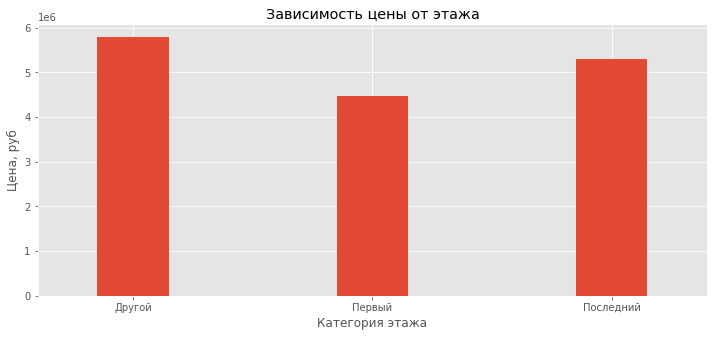

In [35]:
# Изучение зависимости цены от этажности для всех квартир датасета
bar_floor(df_filtered)

**Вывод**

Анализируя этаж, на котором находится квартира, в данном случае рассматриваем первый и последний, то также можно заметить, что на первом этаже стоимость квартиры меньше, чем стоимость тех, что находятся на последнем. Однако, диаграмма показывает, что стоимость квартир, находящихся не на первом и не на последнем этажах, выше стоимости квартир, которые расположены на первом и на последнем этажах. Из этого можно сделать вывод, что больше всего ценятся не первые и не последние этажи. 

In [36]:
# Добавляем отдельные столбцы с годом, месяцем и днём недели
df_filtered['year'] = df['day_exposition'].dt.year
df_filtered['month'] = df['day_exposition'].dt.month
df_filtered['weekday'] = df['day_exposition'].dt.weekday

In [37]:
parametrs_2 = ['year', 'month', 'weekday']
other_labels = [
    ['Год'],
    ['Месяц'],
    ['День недели']
         ]
def bar_plot(df, price):
    labels_dict = dict(zip(parametrs_2, other_labels))
    for f in parametrs_2:
        plt.figure(figsize=(12, 5))
        df.groupby(f)[price].mean().plot(kind='bar', grid=True)
        plt.xlabel(labels_dict[f][0])
        plt.ylabel('Цена, руб.')
        plt.title(f'Зависимость {price} от {f}')
        plt.xticks(rotation=360);

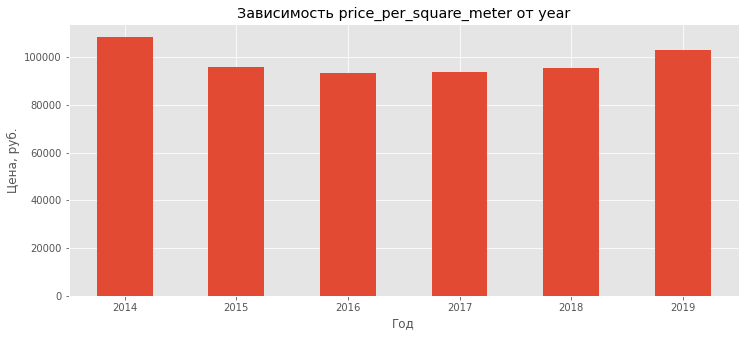

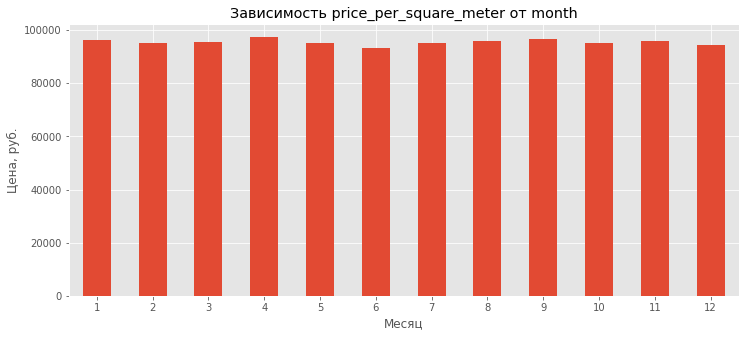

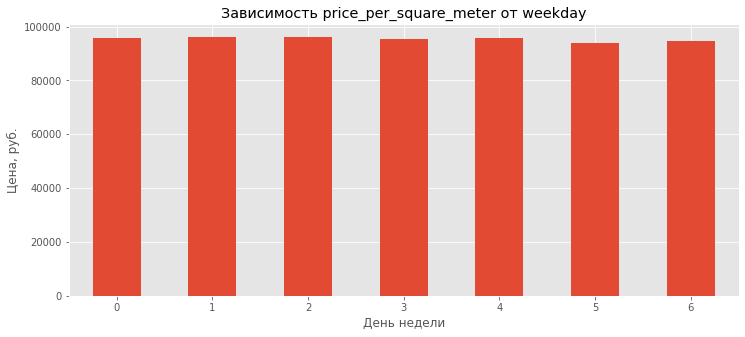

In [38]:
bar_plot(df_filtered, 'price_per_square_meter')

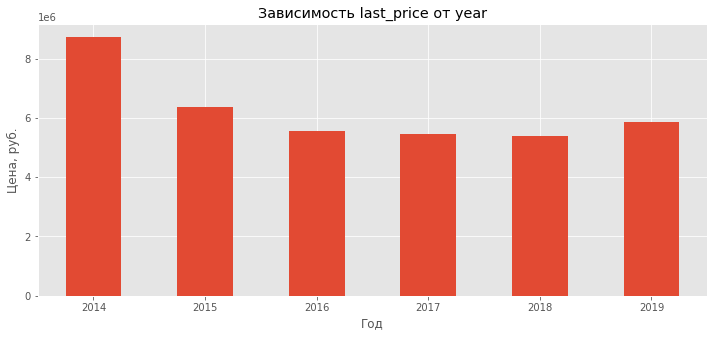

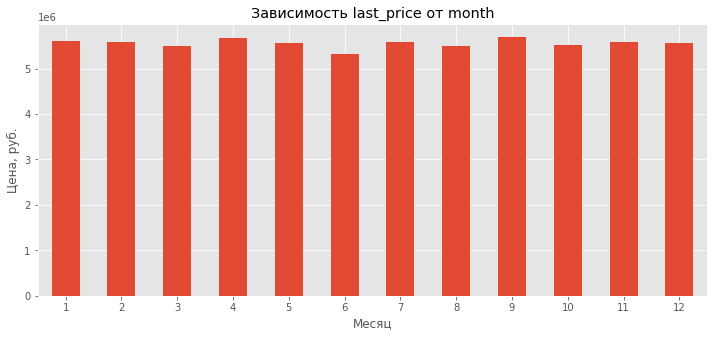

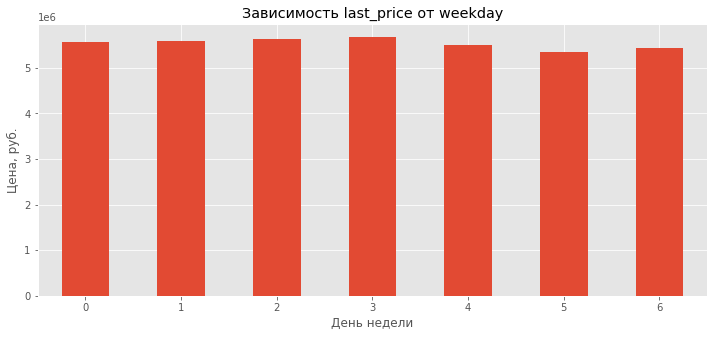

In [39]:
bar_plot(df_filtered, 'last_price')

**Вывод**

Анализируя полученные диаграммы, можно увидеть, что зависимость цены за квадратный метр от года, месяца и дня отличается от зависимости цены на момент снятия с публикации от года, месяца и дня.

Во-первых, в первом случае явно прослеживается спад цены относительно года, однако потом цена стремится к исходному положению и виден рост данного показателя. Во втором случае картина иная: виден резкий спад цены и некая стагнация, то есть прослеживается прямая по цене (цена почти не менялась 3 года: с 2016 по 2018), и только в 2019 году виден рост цены, но совсем не большой. 

Во-вторых, что касается второго и третьего графиков, то здесь так же есть изменения: диаграммы, построенные по столбцу `last_price` более чувствительны к изменениям, чем барплоты, построенные по столбцу `price_per_square_meter`: колебания в первом случае видны намного отчётливее, чем во втором.

### 3.3. Изучение жилья относительно населённого пункта

In [40]:
# Выбираем 10 населённых пунктов с наибольшим числом объявлений
top_10_settlements = df_filtered['locality_name'].value_counts().head(10).index

In [41]:
# Срезаем только те строки, в которых есть населённые пункты с наибольшим числом объявлений
total_data_settlements = df_filtered[df_filtered['locality_name'].isin(top_10_settlements)]       

In [42]:
# Находим среднюю цену квадратного метра в этих населённых пунктах
top_10_piter = (total_data_settlements.pivot_table(index='locality_name', values='price_per_square_meter')
                                      .sort_values(by='price_per_square_meter', ascending=False)
               )
top_10_piter

,price_per_square_meter
locality_name,
Санкт-Петербург,109500.278022
Пушкин,102080.093399
деревня Кудрово,92473.547576
посёлок Парголово,90175.913458
посёлок Мурино,85725.241381
посёлок Шушары,78677.364217
Колпино,75333.295801
Гатчина,68811.372828
Всеволожск,68617.058829


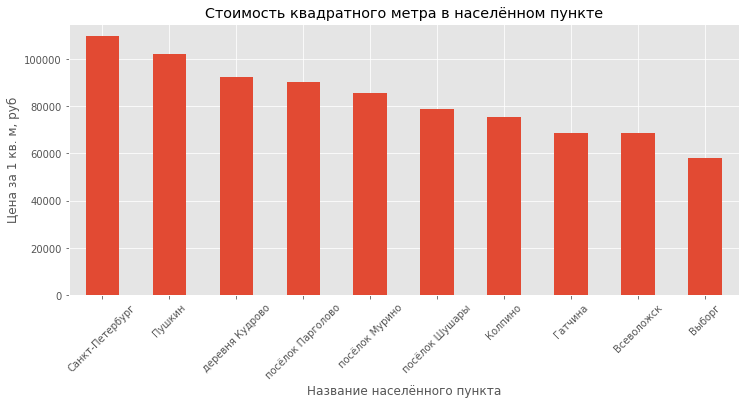

In [43]:
# Изучение стоимости квадратного метра в населённых пунктах
top_10_piter.plot(kind='bar', grid=True, 
                  figsize=(12, 5), legend=False)
plt.xlabel('Название населённого пункта')
plt.ylabel('Цена за 1 кв. м, руб')
plt.title('Стоимость квадратного метра в населённом пункте')
plt.xticks(rotation=45);

**Вывод**

На вышепредставленной диаграмме представлены 10 населённых пунктов с наибольшим числом объявлений

### 3.4. Изучение предложения квартир

In [44]:
# Делаем срез по квартирам из Санкт-Петербурга
df_grouped_piter = df_filtered[df_filtered['locality_name'] == 'Санкт-Петербург']

In [45]:
# Создаём столбец с расстоянием от населённого пункта до центра и переводим расстояние из метров в километры
df_grouped_piter['integer_distance'] = df_filtered['city_centers_nearest'] / 1000
# Округляем значения столбца
df_grouped_piter['integer_distance'] = df_grouped_piter['integer_distance'].round()

In [46]:
# Создаём столбец, который отражает стоимость 1 кв. метра для каждого километра
df_grouped_piter['price_per_km'] = df_grouped_piter['price_per_square_meter'] / df_grouped_piter['integer_distance']

In [47]:
df_grouped_piter.groupby('integer_distance', as_index=False).agg({'price_per_square_meter': 'mean'}).head()

,integer_distance,price_per_square_meter
0,0.0,112706.249699
1,1.0,132402.139129
2,2.0,124807.077864
3,3.0,114024.889842
4,4.0,122794.432580


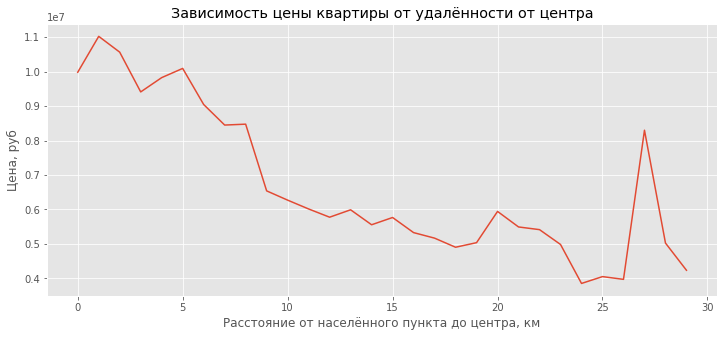

In [48]:
# Строим график, который отражает зависимость цены за 1 кв. метр от удалённости от центра
(df_grouped_piter.pivot_table(index='integer_distance', values='last_price')
                 .plot(figsize=(12, 5), grid=True, legend=False)
)
plt.xlabel('Расстояние от населённого пункта до центра, км')
plt.ylabel('Цена, руб')
plt.title('Зависимость цены квартиры от удалённости от центра');

**Вывод**

График отчётливо показывает, что, чем дальше квартира находится от центра, тем меньше у неё стоит один квадратный метр. 

Также, анализируя график, можно заметить, что сильное измнение направления графика прослеживается примерно на 10 км: после этой отметки сильное снижение стоимости не заметно, дальше график идёт приблизительно по прямой, следовательно, можно считать, что ключевая отметка зоны преодолена. По моему мнению, это означает, что квартиры, которые находятся дальше 10 км, расположены не в центральной зоне города. 

### 3.5. Изучение квартир в центре

In [49]:
# Выделяем те квартиры, которые находятся приблизительно в центральной зоне
apartments_in_the_centers = df_grouped_piter[df_grouped_piter['integer_distance'] <= 10]

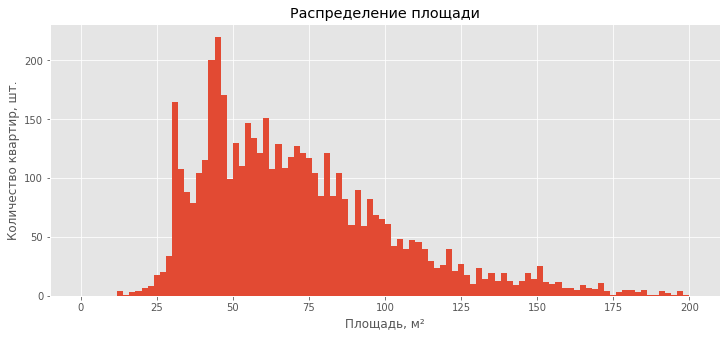

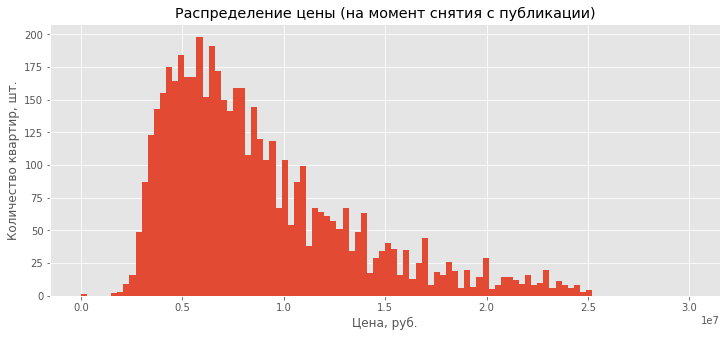

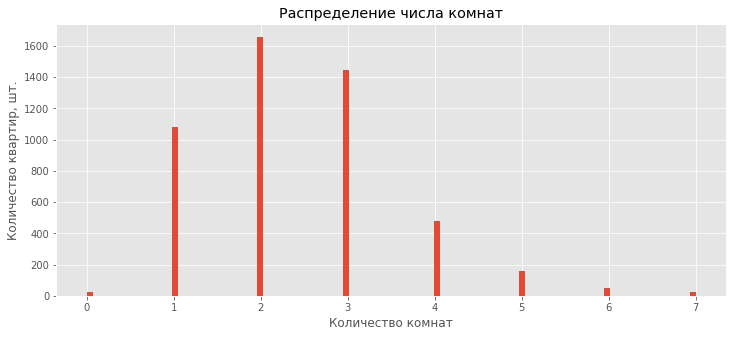

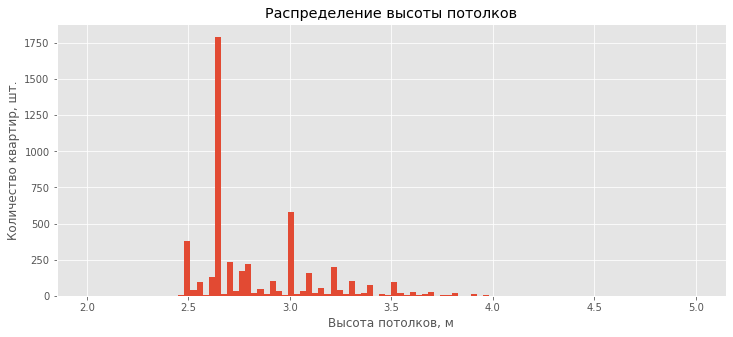

In [50]:
hist_histogram(apartments_in_the_centers)

**Вывод**

Что касается квартир, которые находятся в центре, то большиснтво из них имеют площадь примерно от 40-60 кв. метров. 

Если говорить про цену квадратного метра, то у наибольшего количества квартир этот показатель равен приблизительно 112 тясяч рублей. 

Комнаты у квартир в центре распределны с наибольшей частотой в диапазоне от 1 до 3. 

Говоря про высоту потолков исследуемых квартир, то большинство объектов имеют высоту примерно от 2.5 до 3 метров

**Вывод**

Судя по матрице корреляции, для квартир, находящихся в центре, взаимосвязи между ценой и факторами, которые потенциально могли бы повлиять на стоимость квартиры, нет, либо она очень маленькая. 

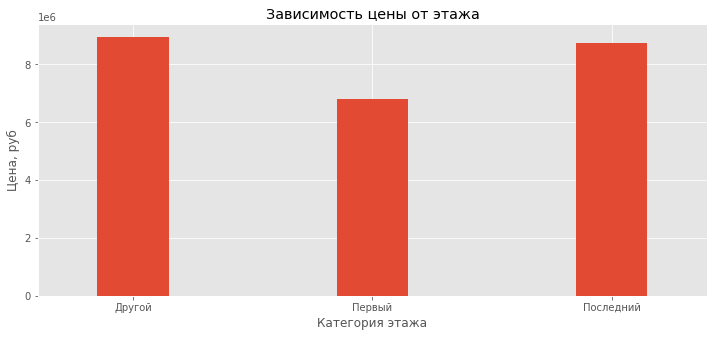

In [51]:
# Изучение зависимости цены от этажности для квартир в центре
bar_floor(apartments_in_the_centers)

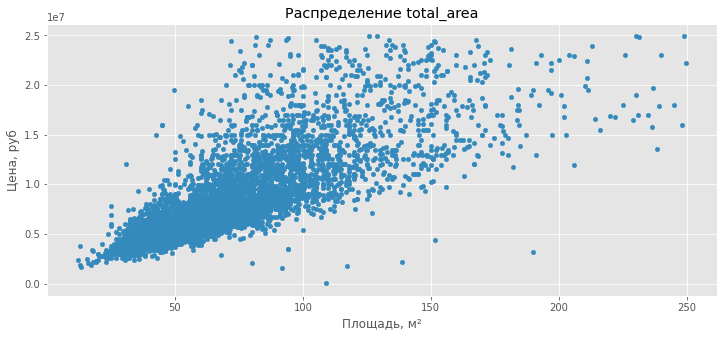

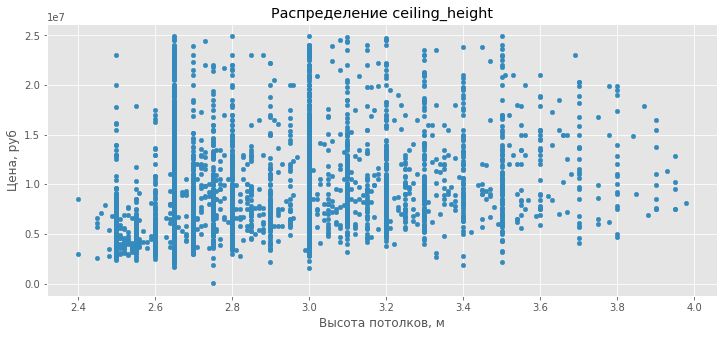

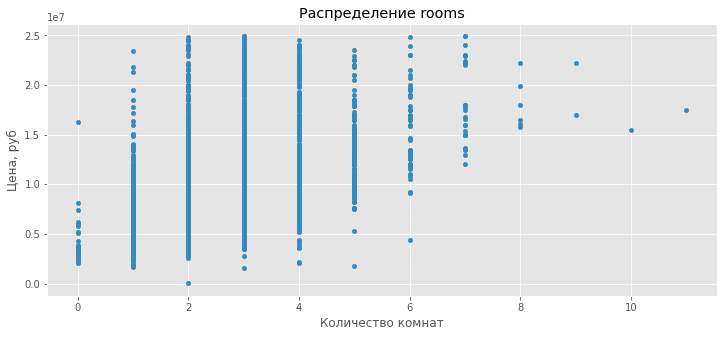

In [52]:
scatter_plot(apartments_in_the_centers)

In [53]:
apartments_in_the_centers[['last_price', 'rooms', 'ceiling_height', 'total_area']].corr()

,last_price,rooms,ceiling_height,total_area
last_price,1.000000,0.537343,0.311644,0.779645
rooms,0.537343,1.000000,0.292030,0.821770
ceiling_height,0.311644,0.292030,1.000000,0.350070
total_area,0.779645,0.821770,0.350070,1.000000


**Вывод**

Что касается зависимости цены от количества комнат, то она достаточно заметная: при увеличении числа комнат, увеличивается и стоимость квартиры. 

Если говорить про взаимосвязь между высотой потолков и ценой, то она умеренная, и как и предыдущая - прямая. Прослеживается связь, что при увеличении метража потолков, увеличивается и стоимость квартиры. 

Однако, если говорить про отдалённость от центра, то связь умеренная, обратная: при увеличении расстояния, снижается стоимость квартиры. 

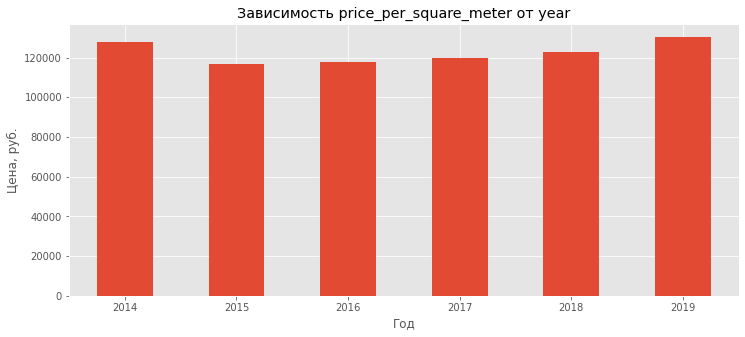

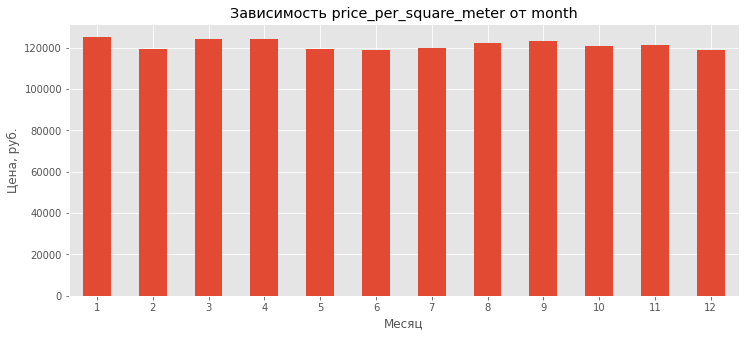

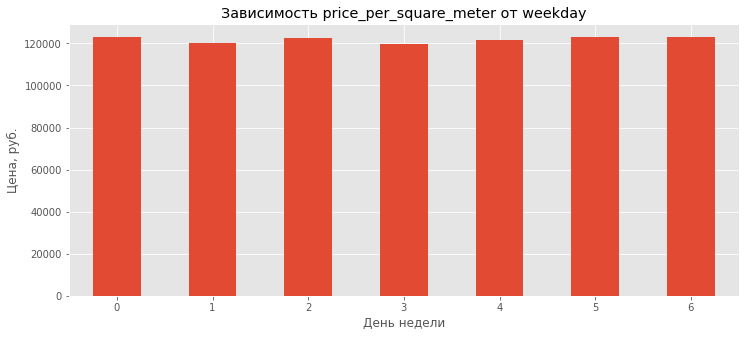

In [54]:
bar_plot(apartments_in_the_centers, 'price_per_square_meter')

**Вывод по квартирам в центре**

Что касается зависимости цены за квадратный метр от года, то здесь можем заметить некую тенденцию роста: при увиличении года, растёт и цена за квадратный метр квартиры. 

Если анализировать зависимость между ценой за квадратный метр и месяцем, то здесь скорее прослеживается некая цикличность: цена с каждым месяцем возрастает до определённого момента, а потом снижается. Можно предположить, что это происходит системно. 

Если смотреть на график зависимости этой же цены от дня недели, то здесь скорее её нет: цена почти не менятся в зависимости от дня недели, поэтому можно утверждать, что день недели не влияет на цену. 

**Вывод**

Если сравнивать квартиры в центре с общим датасетом, то у них заметна разница в цене за квадратный метр по годам: у квартир, которые находятся в центре, достаточно явный подъём в цене из года в год, что не скажешь о квартирах из общего датасета, там виден спад приблизительно до 2016 - середины 2017 годов. 

Также, что касается зависимости от месяцев, то у квартир в центре, колебания прослеживаются сильнее: перепады видны отчётливее.

А что касается дней недели, то ни там, ни там зависимость не видна. 

## 4. Итоговый вывод

В рамках данного исследования была проанализирована недвижимость. Для достижения результата и поставленных целей, в рамках проекта были осуществлены следующие действия.

В процессе исследования были выявлены следующие моменты:

1. Зависимость между ценой на момент снятия с публикации и общей площадью явно прослеживается достаточно сильно: с увеличением площади, увеличивается и цена, следовательно, можно добавить, что зависимость прямая.
2. Зависимость между ценой на момент снятия с публикации и отдалённостью от центра также прослеживается: с увеличением расстояния, снижается стоимость квартир, а также и количество таких квартир. Необходимо заметить, что зависимость обратная.
3. Зависимость между ценой на момент снятия с публикации и числом комнат также прослеживается достаточно хорошо: с увеличением числа комнат, увеличивается и стоимость квартир, необходимо добавить. Замечу, что зависимость представлена прямая. 
4. Больше всего ценятся квартиры, которые находятся не на первом и не на последнем этажах. 
5. Было выявлено, что, начиная с 2016 года по 2019 цена за квадратный метр показывает явный рост и здесь можно точно заметить, что зависимость цены за квадратный метр от года, наблюдается досаточно хорошо. Если говорить про взаимосвязь цены от месяца и дня недели, то здесь нет чёткого представления, прослеживаются некие цикличные скачки, хоть и совсем не большие, то в большую, то в меньшую стороны. 
6. Наиболее часто встречаемая площадь изучаемых квартир находится в диапазоне примерно от 40 до 60. 
7. Большинство квартир, которые были изучены в датафрейме, стоят приблизительно 5 млн. рублей.
8. Наибольшее количество комнат в исследуемых в квартирах находятся в диапазоне от 1 до 3. А также высота потолков в большинстве квартирах равна примерно 2.7 метров. 
9. Медианное время продажи квартир равно 94 дня, а также большинство квартир продаются приблизительно за 80 дней. 
10. Анализируя квартиры в центре и квартиры, находящиеся не в центре, то у них заметна разница в цене за квадратный метр по годам, а также видна корреляция по месяцам, однако выявить взаимосвязь между дням недели не удалось. 